<a href="https://colab.research.google.com/github/stereoyana/pandas_ds_projects/blob/main/karpov_3_platforms_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Проект 3 урока от karpov.courses

В проекте предстоит проанализировать данные о покупках с различных платформ.




### Описание данных

**user_data:**
- client – идентификатор пользователя
- premium – является ли клиент премиум
- age – возраст

**logs:**
- client – идентификатор пользователя
- success – результат (успех - 1, нет - 0)
- platform – платформа
- time – время в формате Unix

### Задачи

- Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
- Какой клиент совершил больше всего успешных операций? (success == True)
- С какой платформы осуществляется наибольшее количество успешных операций?
- Какую платформу предпочитают премиумные клиенты?
- Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет).
- Постройте график распределения числа успешных операций.
- Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?


Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

**1. Сколько уникальных значений принимает переменная platform?**

In [275]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# импортируем нужные библиотеки

In [5]:
users_file = '/content/3_user_data.csv'
logs_file = '/content/3_logs.csv'

# сохраняем пути к датасетам в переменные

In [29]:
user_data = pd.read_csv(users_file, sep=',')

# читаем файл users_file

In [30]:
user_data.head()

# смотрим как выглядит таблица, проверяем что все ок

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [33]:
logs = pd.read_csv(logs_file, sep=',')

# читаем файл logs_file

In [34]:
logs.head()

# смотрим как выглядит таблица, проверяем что все ок

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [35]:
user_data.shape

# узнаем размер таблицы user_data

(2954, 3)

In [36]:
logs.shape

# узнаем размер таблицы logs

(4500, 4)

In [37]:
user_data.dtypes

# узнаем типы данных в user_data

client     int64
premium     bool
age        int64
dtype: object

In [38]:
logs.dtypes

# узнаем типы данных в logs

client       int64
success       bool
platform    object
time         int64
dtype: object

In [39]:
user_data.describe()

# смотрим сводку статистик по user_data

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [40]:
logs.describe()

# смотрим сводку статистик по logs

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [42]:
logs.platform.nunique()

3

**Ответ**

Переменная platform принимает 3 уникальных значения

<br>
<br>
<br>

**2. Какой клиент совершил больше всего успешных операций?**

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания.

In [78]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [86]:
all_pays = logs.query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'platform' : 'count'}) \
    .rename(columns=({'platform' : 'pays'})) \
    .sort_values('pays', ascending=False) \
    .head(10)

In [124]:
max_pays = all_pays.pays.max()

In [125]:
success_clients = all_pays.query('pays == @max_pays') \
    .sort_values('client') \
    .client \
    .tolist() \


In [126]:
', '.join([str(client) for client in success_clients])

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

**Ответ**

Больше всего операций совершили клиенты: 12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584

<br>
<br>
<br>

**3. С какой платформы осуществляется наибольшее количество успешных операций?**

In [127]:
logs.head()


,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [138]:
success_platforms = logs.query('success == True') \
    .groupby('platform', as_index=False) \
    .agg({'success' : 'sum'}) \
    .sort_values(by='success', ascending=False)

In [139]:
success_platforms

,platform,success
1,phone,2019
0,computer,1090
2,tablet,180


**Ответ**

Больше всего успешных операций совершается с платформы phone.

<br>
<br>
<br>

**4. Какая платформа наиболее популярна среди премиумных клиентов?**

In [147]:
total_data = user_data.merge(logs, on='client')

# создаем новый датасет из двух методом merge

In [148]:
total_data.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [161]:
popular_premium_platform = total_data.query('success == True and premium == True') \
    .groupby('platform', as_index=False) \
    .agg({'success' : 'count'}) \
    .sort_values(by='success', ascending=False)

In [162]:
popular_premium_platform

,platform,success
1,phone,177
0,computer,108
2,tablet,18


**Ответ**

Среди премиумных клиентов наиболее популярна платформа phone.


<br>
<br>
<br>

**5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с исходными параметрами.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


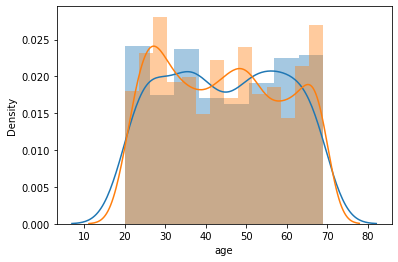

In [175]:
sns.distplot(total_data.query('premium == True').age)
sns.distplot(total_data.query('premium == False').age)


<br>
<br>
<br>

**6. Постройте график распределения числа успешных операций:** 

x – число успешных операций
y – число клиентов, совершивших столько успешных операций


In [233]:
success_operations = total_data.query('success == True') \
    .groupby('client') \
    .agg({'success' : 'sum'}) \
    .rename(columns={'success': 'operations'})

In [234]:
success_operations.value_counts('operations')


operations
1     2051
2       42
41       9
40       1
3        1
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


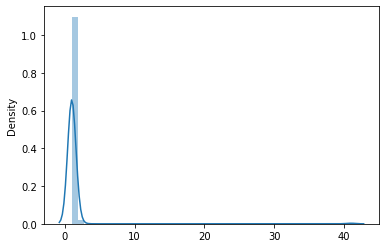

In [242]:
sns.distplot(success_operations)

**Вывод**

- Несколько клиентов совершили более 40 успешных действий
- Бóльшая часть наблюдений сосредоточена в левой части графика

<br>
<br>
<br>

### ⭐️Задание со звёздочкой!⭐️

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 


**Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


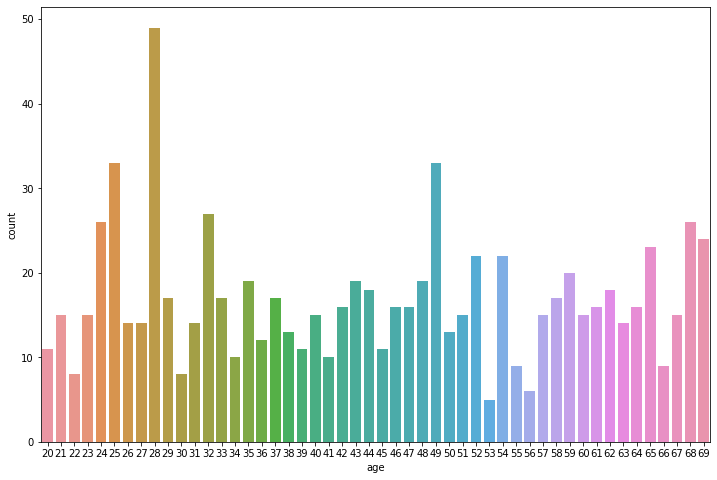

In [289]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(total_data.query('platform == "computer" and success == True').age, x='age')


**Ответ**

Наибольшее количество успешных действий совершили клиенты в возрасте 28 лет.